<center>
<h4>Diplomatura en CDAAyA 2019 - FaMAF - UNC</h4>
<h1>Predicción del Nivel de Pobreza de Hogares en Costa Rica</h1>
<h3>Aprendizaje Automático Supervisado</h3>
</center>
</left>
<h4>Julieta Bergamasco</h4>
</left>

### Introducción

En la siguiente notebook se presentará la consigna a seguir para el cuarto práctico del proyecto, correspondiente a la materia Aprendizaje Automático Supervisado. El objetivo consiste en profundizar en la aplicación de métodos de aprendizaje supervisado aprendidos en el curso, así como también en métodos de _ensemble learning_. Esto, siempre a través de experimentos reproducibles y evaluando a su vez la conveniencia de uno u otro, así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes.

A los fines de este práctico, consideraremos el problema original de nuestro proyecto, el cual consiste en un problema de clasificación múltiple con datos etiquetados. Nuevamente, al igual que en el práctico anterior, será importante evaluar el desbalance de clases y qué decisiones tomaremos al respecto.

Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [126]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import sklearn as skl

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)  # Para mayor determinismo

In [127]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

## Consigna para Aprendizaje Automático Supervisado

### I. Preprocesamiento

A los fines de realizar este práctico, se utilizará el dataset original, pero descartando todas aquellas columnas que se hayan calculado en base a features preexistentes. La división entre train y test será realizada en este mismo práctico.
A continuación se detallan los pasos a seguir para el preprocesamiento de los datos, prácticamente iguales a los del práctico anterior.

#### 1. Obtención del Dataset

Cargar el conjunto de entrenamiento original. Luego, eliminar las columnas calculadas en base a features preexistentes.

#### 2. Aplicar Script de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán los modelos de aprendizaje automático (ML) propuestos, deberán aplicar el script de curación obtenido en el segundo práctico.
En esta etapa, nuevamente, pueden adicionar los atributos que crean pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable `Target`. Por ejemplo, la que crearon de aparatos tecnológicos.

#### 3. Análisis del Balance de Clases

¿Cómo luce el balance de clases? ¿Tomarán alguna decisión al respecto?

#### 4. Multicolinealidad Exacta y Variables Dummies

Las variables explicativas no deben estar muy correlacionadas entre ellas, ya que la variabilidad de una y otra estarán explicando la misma parte de variabilidad de la variable dependiente. Esto es lo que se conoce como multicolinealidad, lo cual deriva en la imposibilidad de estimar los parámetros cuando la misma es exacta o en estimaciones muy imprecisas cuando la misma es aproximada.

Dadas las características de nuestro dataset, nos encontramos con múltiples variables dummies. Analizar en qué casos resulta pertinente descartar la k-ésima dummie de cada categoría.

#### 5. Clasificación a Nivel Hogar o a Nivel Individuo

A partir de análisis previos, sabemos que en nuestro problema la clasificación corresponde al hogar (y no al individuo). Es decir, cada hogar tendrá una única etiqueta. Por lo tanto, para aplicar los modelos, se presentan las siguientes opciones:

a. Quedarse sólo con los individuos jefes o jefas de hogar, y de éstos, con todas las variables asociadas que se repiten para el hogar. Asimismo, crear variables con medidas resumen para todas las variables que no se repitan por hogar.

b. Mantener el dataset a nivel individuo.

Del siguiente punto en adelante, **deberán resolver para el dataset que consideren más apropiado**, en base a los resultados obtenidos en el práctico anterior.

#### 6. Normalización de Atributos

Es posible que sea necesario normalizar las features de nuestro dataset, dado que muchos de los algoritmos de clasificación supervisada lo requieren. ¿En qué casos tendrá que implementarse normalización, considerando los nuevos modelos propuestos?

Aplicar al dataset la normalización de atributos que consideren adecuada.

#### 7. Mezca Aleatória y División en Train/Test

Finalmente, están en condiciones de **dividir el dataset en Train y Test**, utilizando para este último conjunto un 20% de los datos disponibles. Previo a esta división, es recomendable que mezclen los datos aleatoriamente.
De este modo, deberán obtener cuatro conjuntos de datos, para cada uno de los datasets: ```X_train```, ```X_test```, ```y_train``` y ```y_test```.

---

A modo de ayuda, **en esta notebook encontrarán una especie de template** que sigue los pasos propuestos y que deberán ir completando.

Recuerden que la ciencia de datos es un **proceso circular, continuo y no lineal**. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

### II. Aplicación de Modelos de Clasificación de Aprendizaje Automático Supervisado

Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación **para el dataset seleccionado**, utilizando la librería Scikit-Learn (o la que consideren apropiada):

1. Support Vector Machines (SVM), probando clasificadores con distintos kernels.
2. Random Forest, utilizando parámetros de normalización cuando lo crean pertinente.
3. Red neuronal.

Para cada uno de ellos, se pide responder las siguientes consignas:
- Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
- Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?

De estos tres modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Finalmente, **combinar los modelos en un clasificador por votos** (pueden implementar VotingClassifier, del módulo de ensemble).

**Elegir el modelo que consideren que mejor aplica a nuestro problema.** Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

#### 1. Descripción de la Hipótesis

¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

#### 2. Selección de Regularizador

 ¿Utilizarán algún regularizador?¿Cuál?

#### 3. Selección de Función de Costo

¿Cuál será la función de costo utilizada?

#### 4. Justificación de las Selecciones

¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

- Utilizar el método *Grid Search*, o de búsqueda exahustiva, con *cross-validation* para profundizar en la búsqueda y selección de hiperparámetros (fine tuning).
- Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
    + Accuracy o exactitud
    + Reporte de clasificación
    + Confusion matrix o matriz de confusión (graficar como heatmap)
    + Curva ROC y área bajo la curva (AUC).
- Es apropiado utilizar la métrica **acuracy o exactitud** como medida de performance de nuestro modelo, de acuerdo a los datos con los que contamos? Por qué?

### Entregables

El entregable de este práctico consiste en **esta misma Notebook**, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

Además, deberán sintetizar las principales conclusiones de éste y el anterior práctico en un PPT (dataset utilizado para entrenar el modelo, modelo más apropiado, selección de hiperparámetros y métricas calculadas).

# Resolución

## I. Preprocesamiento

### 1. Carga de Datos

Para comenzar, importamos los datos que vamos a utilizar:

In [146]:
# Cargamos el dataset original en una variable
url_data_train = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train.csv'
_ds = pd.read_csv(url_data_train)
_ds.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [147]:
# Cargamos el Dataset Fields en una variable, para tener la información de cada campo a mano
# Si hay nueva metadata, cargarla posteriormente
url_fields_info = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/Dataset%20Fields.txt'
_data_fields = pd.read_csv(url_fields_info, sep='\t', encoding = 'cp1252')
_data_fields.head(5)

,Variable_name,Variable_description
0,v2a1,Monthly rent payment
1,hacdor,=1 Overcrowding by bedrooms
2,rooms,number of all rooms in the house
3,hacapo,=1 Overcrowding by rooms
4,v14a,=1 has bathroom in the household


Recuerden que la variable `Target` constituye nuestro objetivo original de predicción. Es la etiqueta de los datos de acuerdo al nivel de pobreza del hogar que habita cada individuo, según la siguiente escala o clases:

1 = pobreza extrema<br>
2 = pobreza moderada<br>
3 = hogares vulnerables<br>
4 = hogares no vulnerables<br>

In [148]:
# Eliminamos columnas que son features calculadas en base a otras features
_calc_feat = _ds.loc[:,'SQBescolari':'agesq'].columns
print('Columnas eliminadas: ', _calc_feat.values)
_ds.drop(columns = _calc_feat, inplace = True)

Columnas eliminadas:  ['SQBescolari' 'SQBage' 'SQBhogar_total' 'SQBedjefe' 'SQBhogar_nin'
 'SQBovercrowding' 'SQBdependency' 'SQBmeaned' 'agesq']


<div class="alert alert-block alert-info">
El dataset ya está **listo para trabajar!**
</div>

### 2. Aplicar Script de Curación

El siguiente paso implica aplicar el script que resultó del práctico anterior. También pueden adicionar campos calculados en base a otros atributos, según lo consideren pertinente.

In [149]:
from script_curacion import exec_script

_ds_reduced,_data_fields = exec_script(_ds, _data_fields)

/users/akraupl/miniconda3/envs/mentoria/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/users/akraupl/Mentoria/CostaRica/script_curacion.py:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _ds_reduced[col]= pd.to_numeric(_ds_reduced[col],downcast='unsigned',errors='ignore')
/users/akraupl/miniconda3/envs/mentoria/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [150]:
_ds_reduced.head(10)

,Id,Edad,female,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,Anios_escolaridad_hechos,Anios_escolaridad_faltantes,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,Tiene_tablet,Cant_tablets,Cant_hom_menores_12,Cant_hom_mayores_12,Total_hombres,Cant_muj_menores_12,Cant_muj_mayores_12,Total_mujeres,Cant_indiv_menores_12,Cant_indiv_mayores_12,Total_indiv,Tamanio_vivienda,Cant_habitantes_depend,Educ_jefe,Razon_Hombres_Total,Razon_Mujeres_Total,Razon_Ninios_Total,Razon_Adultos_Total,Razon_Ancianos_Total,idhogar,Renta,hogar_nin,hogar_adul,hogar_mayor,Exceso_habitaciones,Habitaciones,Exceso_ambientes,Tiene_banio,refrig,Tamanio_hogar_hhsize,Educ_media,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,pisomoscer,pisocemento,pisoother,pisonatur,pisomadera,techozinc,techoentrepiso,techocane,cielorazo,abastaguadentro,abastaguafuera,Electridad_publica,Electridad_privada,Electridad_cooperativa,sanitario1,sanitario2,sanitario3,sanitario5,energcocinar1,energcocinar2,energcocinar3,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,epared1,epared2,etecho1,etecho2,eviv1,eviv2,bedrooms,Indiv_x_ambientes,tipovivi1,tipovivi2,tipovivi3,tipovivi4,Tiene_pc,Tiene_tv,Tiene_cel,Cant_cel,Central,Chorotega,Pacifico_Central,Brunca,Huetar_Atlantica,area1,Target
0,ID_279628684,43,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0.0,10,1.00,0.00,0.0,1.0,0.0,21eb7fcc1,190000.0,0,1,0,0,3,0,1,1,1,10.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,1.000000,0,0,1,0,0,0,1,1,1,0,0,0,0,1,4
1,ID_f29eb3ddd,67,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1.0,12,1.00,0.00,0.0,1.0,1.0,0e5d7a658,135000.0,0,1,1,0,4,0,1,1,1,12.0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,1.000000,0,0,1,0,0,0,1,1,1,0,0,0,0,1,4
2,ID_68de51c94,92,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1.0,11,0.00,1.00,0.0,1.0,1.0,2c7317ea8,0.0,0,1,1,0,8,0,1,1,1,11.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4
3,ID_d671db89c,17,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0,1,0,0,0,0,1,1,0,2,2,1,1,2,1,3,4,4,1.0,11,0.50,0.50,0.5,0.5,0.0,2b58d945f,180000.0,2,2,0,0,5,0,1,1,4,11.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,1,3,1,0,0,0,0,1,4
4,ID_d56d6f5f5,37,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,1,0,0,0,1,1,0,2,2,1,1,2,1,3,4,4,1.0,0,0.50,0.50,0.5,0.5,0.0,2b58d945f,180000.0,2,2,0,0,5,0,1,1,4,11.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,1,3,1,0,0,0,0,1,4
5,ID_ec05b1a7b,38,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,1,0,0,0,1,1,0,2,2,1,1,2,1,3,4,4,1.0,11,0.50,0.50,0.5,0.5,0.0,2b58d945f,180000.0,2,2,0,0,5,0,1,1,4,11.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,1,3,1,0,0,0,0,1,4
6,ID_e9e0c1100,8,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,1,0,2,2,1,1,2,1,3,4,4,1.0,0,0.50,0.50,0.5,0.5,0.0,2b58d945f,180000.0,2,2,0,0,5,0,1,1,4,11.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,1,3,1,0,0,0,0,1,4
7,ID_3e04e571e,7,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,2,1,3,2,2,4,4,1.0,0,0.25,0.75,0.5,0.5,0.0,d6dae86b7,130000.0,2,2,0,1,2,0,1,1,4,10.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,4.000000,0,0,1,0,0,0,1,1,1,0,0,0,0,1,4
8,ID_1284f8aad,30,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,1,0,0,0,0,0,0,0,1,1,2,1,3,2,2,4,4,1.0,9,0.25,0.75,0.5,0.5,0.0,d6dae86b7,130000.0,2,2,0,1,2,0,1,1,4,10.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1

### 3. Análisis de Balance de Clases

Evaluar el balance de clases. Dejar plasmadas las decisiones que tomen al respecto.

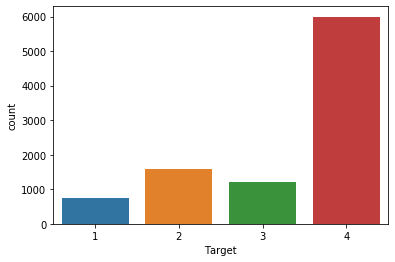

In [151]:
sns.countplot(x='Target', data = _ds)

Observamos que las clases objetivo están desbalanceadas. La clase de individuos tipo 4 son más de 3 veces que la siguiente (tipo 2).

### 4. Multicolinealidad Exacta y Variables Dummies

Decisiones respecto a las variables con multicolinealidad perfecta.

- Las decisiones tomadas respecto al a multicolinealidad exacta y variablas dummies fueron visualizadas en el práctico anterior y agregadas al script de curación del dataset.
- Se eliminó un feature de cada categoría binarizada.

### 5. Clasificación a Nivel Hogar o a Nivel Individuo

En este punto, deberán elegir si trabajar el dataset por individuo o por hogar.

En caso de elegir hacerlo por hogar, crear un nuevo dataset, `_ds_hogar`, manteniendo únicamente los individuos jefe de hogar (```parentesco1 == 1```) y los atributos que se repitan por hogar. Para aquellos atributos individuales, crear medidas sintéticas por hogar relevantes (suma, promedio simple, promedio ponderado, máximo, mínimo, etc.).

Por ejemplo, para la escolaridad, mantendría la de la persona jefa de hogar y crearía otra (u otras) que indiquen la escolaridad promedio o la escolaridad promedio por adulto.

In [152]:
hogar_cols = ['idhogar','Renta','Exceso_habitaciones','Habitaciones', 'Tiene_banio','hogar_nin', 'hogar_adul',
               'hogar_mayor','refrig','paredblolad', 'paredzocalo', 'paredpreb', 'pareddes',
               'paredmad', 'paredzinc', 'paredfibras', 'pisomoscer',
               'pisocemento', 'pisoother', 'pisonatur', 
               'pisomadera', 'techozinc', 'techoentrepiso', 'techocane',
               'cielorazo', 'abastaguadentro', 'abastaguafuera',
               'Electridad_publica', 'Electridad_privada', 
               'Electridad_cooperativa','sanitario1', 'sanitario2', 'sanitario3', 'sanitario5',
               'energcocinar1', 'energcocinar2', 'energcocinar3',
               'elimbasu1', 'elimbasu2', 'elimbasu3',
               'elimbasu4', 'elimbasu5', 'epared1', 'epared2',
               'etecho1', 'etecho2', 'eviv1', 'eviv2',
               'bedrooms', 'tipovivi1', 'tipovivi2',
               'tipovivi3', 'tipovivi4', 'Central', 'Chorotega', 'Pacifico_Central',
               'Brunca', 'Huetar_Atlantica', 'area1', 
               'Tamanio_hogar_hhsize','Tiene_tablet','Cant_tablets','Cant_hom_menores_12','Cant_hom_mayores_12',
               'Total_hombres','Cant_muj_menores_12','Cant_muj_mayores_12',
               'Total_mujeres','Cant_indiv_menores_12','Cant_indiv_mayores_12','Total_indiv',
               'Tamanio_vivienda','Cant_habitantes_depend','Educ_jefe','Exceso_ambientes',
               'Indiv_x_ambientes','Tiene_pc','Tiene_tv','Tiene_cel','Cant_cel','Target']     


In [153]:
_ds_hogar = _ds_reduced.groupby(hogar_cols).agg({
    'female': 'sum',
    'Edad': 'mean',
    'dis': 'sum',
    'Anios_escolaridad_hechos':'sum',
    'Anios_escolaridad_faltantes':'sum',
    'Educ_media':'mean',
    'estadocivil1':'sum',
    'estadocivil2':'sum',
    'estadocivil3':'sum',
    'estadocivil4':'sum',
    'estadocivil5':'sum',
    'estadocivil6':'sum',
    'parentesco1':'sum',
    'parentesco2':'sum',
    'parentesco3':'sum',
    'parentesco4':'sum',
    'parentesco5':'sum',
    'parentesco6':'sum',
    'parentesco7':'sum',
    'parentesco8':'sum',
    'parentesco9':'sum',
    'parentesco10':'sum',
    'parentesco11':'sum',
    'instlevel1':'sum', 
    'instlevel2':'sum',
    'instlevel3':'sum', 
    'instlevel4':'sum', 
    'instlevel5':'sum',
    'instlevel6':'sum',
    'instlevel7':'sum', 
    'instlevel8':'sum'
}).reset_index()

In [154]:
len(_ds_hogar.columns)

112

In [155]:
_ds_hogar = _ds_hogar.rename(columns={
    'female': 'Cant_mujeres',
    'Edad': 'Edad_promedio',
    'dis': 'Cant_disc',
    'estadocivil1':'Cant_estadocivil1estadocivil1',
    'estadocivil2':'Cant_estadocivil2',
    'estadocivil3':'Cant_estadocivil3',
    'estadocivil4':'Cant_estadocivil4',
    'estadocivil5':'Cant_estadocivil5',
    'estadocivil6':'Cant_estadocivil6',
    'parentesco1':'Cant_parentesco1',
    'parentesco2':'Cant_parentesco2',
    'parentesco3':'Cant_parentesco3',
    'parentesco4':'Cant_parentesco4',
    'parentesco5':'Cant_parentesco5',
    'parentesco6':'Cant_parentesco6',
    'parentesco7':'Cant_parentesco7',
    'parentesco8':'Cant_parentesco8',
    'parentesco9':'Cant_parentesco9',
    'parentesco10':'Cant_parentesco10',
    'parentesco11':'Cant_parentesco11',
    'instlevel1':'Cant_instlevel1', 
    'instlevel2':'Cant_instlevel2',
    'instlevel3':'Cant_instlevel3', 
    'instlevel4':'Cant_instlevel4', 
    'instlevel5':'Cant_instlevel5',
    'instlevel6':'Cant_instlevel6',
    'instlevel7':'Cant_instlevel7', 
    'instlevel8':'Cant_instlevel8'
})

### 6. Normalización de Atributos

Aplicar al dataset la normalización de atributos que consideren adecuada.

In [157]:
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()

In [158]:
_ds_hogar.dtypes.value_counts()

uint64     77
uint8      29
float64     5
object      1
dtype: int64

In [159]:
_ds_hogar.select_dtypes(include=['object']).head(1)

,idhogar
0,001ff74ca


In [160]:
_ds_hogar.head(1)

,idhogar,Renta,Exceso_habitaciones,Habitaciones,Tiene_banio,hogar_nin,hogar_adul,hogar_mayor,refrig,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,pisomoscer,pisocemento,pisoother,pisonatur,pisomadera,techozinc,techoentrepiso,techocane,cielorazo,abastaguadentro,abastaguafuera,Electridad_publica,Electridad_privada,Electridad_cooperativa,sanitario1,sanitario2,sanitario3,sanitario5,energcocinar1,energcocinar2,energcocinar3,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,epared1,epared2,etecho1,etecho2,eviv1,eviv2,bedrooms,tipovivi1,tipovivi2,tipovivi3,tipovivi4,Central,Chorotega,Pacifico_Central,Brunca,Huetar_Atlantica,area1,Tamanio_hogar_hhsize,Tiene_tablet,Cant_tablets,Cant_hom_menores_12,Cant_hom_mayores_12,Total_hombres,Cant_muj_menores_12,Cant_muj_mayores_12,Total_mujeres,Cant_indiv_menores_12,Cant_indiv_mayores_12,Total_indiv,Tamanio_vivienda,Cant_habitantes_depend,Educ_jefe,Exceso_ambientes,Indiv_x_ambientes,Tiene_pc,Tiene_tv,Tiene_cel,Cant_cel,Target,Cant_mujeres,Edad_promedio,Cant_disc,Anios_escolaridad_hechos,Anios_escolaridad_faltantes,Educ_media,Cant_estadocivil1estadocivil1,Cant_estadocivil2,Cant_estadocivil3,Cant_estadocivil4,Cant_estadocivil5,Cant_estadocivil6,Cant_parentesco1,Cant_parentesco2,Cant_parentesco3,Cant_parentesco4,Cant_parentesco5,Cant_parentesco6,Cant_parentesco7,Cant_parentesco8,Cant_parentesco9,Cant_parentesco10,Cant_parentesco11,Cant_instlevel1,Cant_instlevel2,Cant_instlevel3,Cant_instlevel4,Cant_instlevel5,Cant_instlevel6,Cant_instlevel7,Cant_instlevel8
0,001ff74ca,0.0,0,6,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,1,0,0,2,1,1,0,0,0,1,1,2,1,1,2,2,1.0,16,0,0.5,0,0,1,1,4,2,19.0,0,16,0,16.0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


Debemos normalizar únicamente los features numéricos. Por ende debemos eliminar el `idhogar` para la normalización.

In [161]:
_ds_standar = _ds_hogar.select_dtypes(exclude=['object'])

# También debemos evitar normalizar la clase objetivo, esta no será parte del entrenamiento.
_ds_standar = _ds_standar.drop(columns=['Target'],axis=0)
_cols_standar = _ds_standar.columns
_ds_standar.dtypes.value_counts()

uint64     76
uint8      29
float64     5
dtype: int64

In [162]:
standard_scaler.fit(_ds_standar.values)
_ds_standar = standard_scaler.transform(_ds_standar)

In [163]:
_ds_hogar[_cols_standar]= _ds_standar
_ds_hogar.head(5)

,idhogar,Renta,Exceso_habitaciones,Habitaciones,Tiene_banio,hogar_nin,hogar_adul,hogar_mayor,refrig,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,pisomoscer,pisocemento,pisoother,pisonatur,pisomadera,techozinc,techoentrepiso,techocane,cielorazo,abastaguadentro,abastaguafuera,Electridad_publica,Electridad_privada,Electridad_cooperativa,sanitario1,sanitario2,sanitario3,sanitario5,energcocinar1,energcocinar2,energcocinar3,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,epared1,epared2,etecho1,etecho2,eviv1,eviv2,bedrooms,tipovivi1,tipovivi2,tipovivi3,tipovivi4,Central,Chorotega,Pacifico_Central,Brunca,Huetar_Atlantica,area1,Tamanio_hogar_hhsize,Tiene_tablet,Cant_tablets,Cant_hom_menores_12,Cant_hom_mayores_12,Total_hombres,Cant_muj_menores_12,Cant_muj_mayores_12,Total_mujeres,Cant_indiv_menores_12,Cant_indiv_mayores_12,Total_indiv,Tamanio_vivienda,Cant_habitantes_depend,Educ_jefe,Exceso_ambientes,Indiv_x_ambientes,Tiene_pc,Tiene_tv,Tiene_cel,Cant_cel,Target,Cant_mujeres,Edad_promedio,Cant_disc,Anios_escolaridad_hechos,Anios_escolaridad_faltantes,Educ_media,Cant_estadocivil1estadocivil1,Cant_estadocivil2,Cant_estadocivil3,Cant_estadocivil4,Cant_estadocivil5,Cant_estadocivil6,Cant_parentesco1,Cant_parentesco2,Cant_parentesco3,Cant_parentesco4,Cant_parentesco5,Cant_parentesco6,Cant_parentesco7,Cant_parentesco8,Cant_parentesco9,Cant_parentesco10,Cant_parentesco11,Cant_instlevel1,Cant_instlevel2,Cant_instlevel3,Cant_instlevel4,Cant_instlevel5,Cant_instlevel6,Cant_instlevel7,Cant_instlevel8
0,001ff74ca,-0.415283,-0.153633,0.788922,0.075817,-0.025119,-1.349324,-0.503906,0.203095,0.792039,-0.286946,-0.470609,-0.085707,-0.348319,-0.101757,-0.031407,0.628574,-0.508670,-0.028088,-0.028088,-0.260309,-5.690481,7.125694,-0.044438,0.648454,0.175732,-0.167206,0.357149,-0.024323,-0.350449,-0.06599,-0.533439,0.559899,-0.103716,-0.054452,0.985909,-0.899037,-2.841993,5.769210,-0.291746,-0.034408,0.0,-0.327315,-0.664438,-0.380938,-0.613949,-0.316879,-0.558381,1.485725,0.775330,-0.337551,-0.46435,-0.119128,-1.215043,-0.313857,-0.263318,3.355002,-0.318383,-1.601000,-0.908668,1.816590,1.010505,-0.506372,-1.555831,-1.640813,1.229098,-0.546114,0.264260,0.485953,-1.461095,-0.914530,-0.909591,0.525273,2.130398,-0.114799,-1.247747,-0.340802,-0.615775,0.18276,-1.137538,4,0.932470,-1.064542,-0.316337,0.327844,-0.221366,1.581789,1.385403,-0.497252,-0.941929,-0.246354,2.530873,-0.253356,0.870014,-0.714856,0.381472,-0.111558,-0.132115,-0.240295,-0.136642,-0.06748,-0.135953,-0.067567,-0.129525,1.430140,-0.559168,-0.654675,-0.584819,-0.454650,-0.167134,-0.162772,1.447581
1,003123ec2,-0.415283,-0.153633,-1.288395,0.075817,0.836060,-0.357226,-0.503906,0.203095,-1.262565,-0.286946,2.124904,-0.085707,-0.348319,-0.101757,-0.031407,-1.590901,1.965913,-0.028088,-0.028088,-0.260309,0.175732,-0.140337,-0.044438,-1.542129,0.175732,-0.167206,0.357149,-0.024323,-0.350449,-0.06599,-0.533439,0.559899,-0.103716,-0.054452,-1.014292,1.112301,0.351866,-0.173334,-0.291746,-0.034408,0.0,-0.327315,1.505032,-0.380938,-0.613949,3.155783,-0.558381,-0.678665,-1.289774,-0.337551,-0.46435,-0.119128,-1.215043,-0.313857,-0.263318,-0.298062,3.140875,0.624609,0.399484,-0.550482,-0.471374,2.977469,-0.429042,1.304177,-0.488930,-0.546114,-0.703169,1.630143,-0.659625,0.393525,0.310410,0.525273,-0.881115,-0.114799,0.763443,-0.340802,-0.615775,0.18276,-0.401049,2,0.056456,-0.849219,-0.316337,-0.716545,-0.221366,-0.666532,-0.458651,1.715957,-0.941929,-0.246354,-0.322827,-0.253356,-1.149406,1.398884,-0.834350,-0.111558,-0.132115,-0.240295,-0.136642,-0.06748,-0.135953,-0.067567,-0.129525,-0.457615,-0.559168,-0.654675,1.152518,-0.454650,-0.167134,-0.162772,-0.508485
2,003123ec2,-0.415283,-0.153633,-1.288395,0.075817,0.836060,-0.357226,-0.503906,0.203095,-1.262565,-0.286946,2.124904,-0.085707,-0.348319,-0.101757,-0.031407,-1.590901,1.965913,-0.028088,-0.028088,-0.260309,0.175732,-0.140337,-0.044438,-1.542129,0.175732,-0.167206,0.357149,-0.024323,-0.350449,-0.06599,-0.533439,0.

### 7. Mezca Aleatória y División en Train/Test

Primeramente, deberán mezclar los datos aleatoriamente. Luego, para dividir en Train/Test el dataset, aplicar el split utilizando un 20% de datos para este último.

En este punto, deberán obtener cuatro conjuntos de datos, para ambos datasets: ```X_train```, ```X_test```, ```y_train``` y ```y_test```.

**Análisis de balance de clases del `_ds_hogar`**

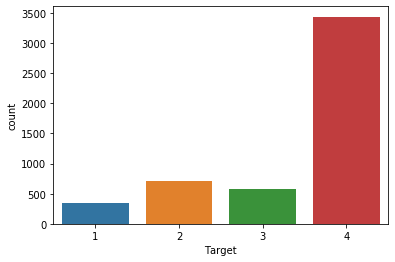

In [164]:
sns.countplot(x='Target', data = _ds_hogar)

- Podemos observar que la proporción de clases es aproximadamente la misma comparando los data set de individuos y hogares.
- Debemos plantear una estrategia de balanceo de clases para que los algoritmos puedan entrenar con una cantidad similar de clases.
- Si quisieramos balancear el dataset utilizando reduciendolo mediante UnderSample nos quedaría un dataset muy pequeño, ya que la clase 1 tiene muy pocos registros si lo comparamos con las demás. Es por ello que nos enfocamos en una estrategia de OverSample (SMOTE), generando registros sintéticos de la misma clase hasta igualar la cantidad de registros que posee la clase mayoritaria.
- Además, vamos a realizar pruebas con el dataset original, es decir desbalanceado

In [165]:
_ds_shuff = shuffle(_ds_hogar)
y = _ds_shuff['Target']
X = _ds_shuff
#Eliminamos Target para el conjunto de datos de entrenamiento
X = X.drop(['Target','idhogar'], axis=1)
#X = X.drop(['Target'], axis=1)

In [166]:
X.shape, y.shape,_ds_shuff.shape

((5074, 110), (5074,), (5074, 112))

In [167]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from collections import Counter

In [168]:
def plot_pie(y):
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
        return my_autopct

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct=make_autopct(sizes))
    ax.axis('equal')

# División del dataset y entrenamiento de modelos

## A. Sin balanceo de clases

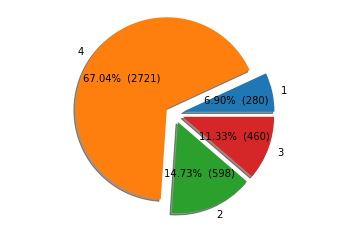

In [169]:
_ds_shuff = shuffle(_ds_hogar)
y = _ds_shuff['Target']
X = _ds_shuff
#Eliminamos Target para el conjunto de datos de entrenamiento
X = X.drop(['Target','idhogar'], axis=1)
#X = X.drop(['Target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=42)
plot_pie(y_train)

### A.1. Support Vector Machines

A continuación se aplicará un clasificador SVM.

In [170]:
model_svm = svm.SVC(C=1.0,
                    kernel="rbf", 
                    #class_weight = 'balanced',
                    random_state=0)
model_svm.fit(X_train, y_train)

/users/akraupl/miniconda3/envs/mentoria/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [171]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train =  model_svm.predict(X_train) # Obtenemos las predicciones para conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test =  model_svm.predict(X_test) # Obtenemos las predicciones para conjunto de validación
accuracy_test = accuracy_score(y_test, y_pred_test)

In [172]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.7982261640798226
Accuracy_test: 	0.7379310344827587


### A.2. Random Forest

A continuación se aplicará un Random Forest para clasificar nuestro dataset.

In [173]:
model_rf = ensemble.RandomForestClassifier(n_jobs=20,
                                           #class_weight = 'balanced',
                                           random_state=2,
                                           min_samples_leaf=1)
model_rf.fit(X_train, y_train)

/users/akraupl/miniconda3/envs/mentoria/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=20,
                       oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [174]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model_rf.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = model_rf.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [175]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.9935944813993595
Accuracy_test: 	0.7655172413793103


### A.3. Neural Network

A continuación se entrenará una red neuronal para clasificar el dataset. Pueden usar otra librería si lo desean, por ejemplo, Keras.

In [176]:
model_nn = neural_network.MLPClassifier(solver='lbfgs',
                                     #activation='logistic',
                                     alpha=1e-3, 
                                     hidden_layer_sizes=(5, 2),
                                     random_state=1, 
                                     max_iter=5000)
model_nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [177]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model_nn.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = model_nn.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [178]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.7341709780734171
Accuracy_test: 	0.7083743842364532


### A.4. Clasificador por Votos

In [179]:
# Implementar VotingClassifier
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('rf', model_rf),
                                     ('svm', model_svm),
                                     ('nn', model_nn)],
                         voting='hard',
                        n_jobs=20)
eclf1 = eclf1.fit(X_train, y_train)

In [180]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = eclf1.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = eclf1.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.8433111603843311
Accuracy_test: 	0.7448275862068966


## B. Sin balanceo de clases. Ponderando clases en modelos

### B.1. Support Vector Machines

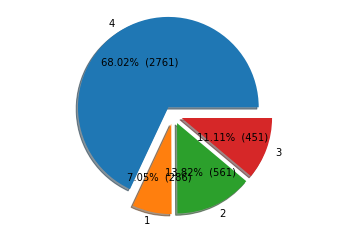

In [181]:
_ds_shuff = shuffle(_ds_hogar)
y = _ds_shuff['Target']
X = _ds_shuff
#Eliminamos Target para el conjunto de datos de entrenamiento
X = X.drop(['Target','idhogar'], axis=1)
#X= X.drop(['Target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=42)
plot_pie(y_train)

In [182]:
model_svm = svm.SVC(C=1.0,
                    kernel="rbf", 
                    class_weight = 'balanced',
                    random_state=0)
model_svm.fit(X_train, y_train)

/users/akraupl/miniconda3/envs/mentoria/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [183]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train =  model_svm.predict(X_train) # Obtenemos las predicciones para conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test =  model_svm.predict(X_test) # Obtenemos las predicciones para conjunto de validación
accuracy_test = accuracy_score(y_test, y_pred_test)

In [184]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.823109140182311
Accuracy_test: 	0.6492610837438424


### B.2. Random Forest

A continuación se aplicará un Random Forest para clasificar nuestro dataset.

In [185]:
model_rf = ensemble.RandomForestClassifier(n_jobs=20,
                                           class_weight = 'balanced',
                                           random_state=2)
model_rf.fit(X_train, y_train)

/users/akraupl/miniconda3/envs/mentoria/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=20, oob_score=False,
                       random_state=2, verbose=0, warm_start=False)

In [186]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model_rf.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = model_rf.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [187]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.9948263118994827
Accuracy_test: 	0.7477832512315271


### B.3. Neural Network

A continuación se entrenará una red neuronal para clasificar el dataset. Pueden usar otra librería si lo desean, por ejemplo, Keras.

In [188]:
model_nn = neural_network.MLPClassifier(solver='lbfgs',
                                     #activation='logistic',
                                     alpha=1e-3, 
                                     hidden_layer_sizes=(5, 2),
                                     random_state=1, 
                                     max_iter=5000)
model_nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [189]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model_nn.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = model_nn.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)# Se calcula la exactitud para ambos conjuntos, train y test:


In [190]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.7590539541759054
Accuracy_test: 	0.6955665024630542


### B.4. Clasificador por Votos

In [191]:
# Implementar VotingClassifier
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('rf', model_rf),
                                     ('svm', model_svm),
                                     ('nn', model_nn)],
                         voting='hard',
                        n_jobs=20)
eclf1 = eclf1.fit(X_train, y_train)

In [192]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = eclf1.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = eclf1.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.9556541019955654
Accuracy_test: 	0.7339901477832512


## C. Con balanceo de clases. Método: SMOTE

Sampling_strategy: all
y: Counter({2: 2732, 1: 2732, 4: 2732, 3: 2732})


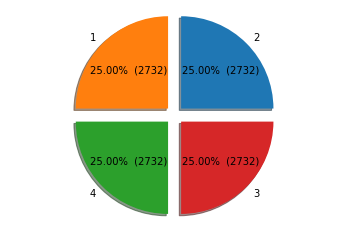

In [193]:
_ds_shuff = shuffle(_ds_hogar)
y = _ds_shuff['Target']
X = _ds_shuff
#Eliminamos Target para el conjunto de datos de entrenamiento
X = X.drop(['Target','idhogar'], axis=1)
#X = X.drop(['Target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=42)
sampling_strategy = 'all'

sm = SMOTE(random_state=42,
           k_neighbors=9,
          sampling_strategy=sampling_strategy,
          n_jobs=20)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('Sampling_strategy: {}\ny: {}'.format(sampling_strategy, Counter(y_train)))
plot_pie(y_train)

### C.1. Support Vector Machines

In [194]:
model_svm = svm.SVC(C=1.0,
                    kernel="rbf", 
                    #class_weight = 'balanced',
                    random_state=0)
model_svm.fit(X_train, y_train)

/users/akraupl/miniconda3/envs/mentoria/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [195]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train =  model_svm.predict(X_train) # Obtenemos las predicciones para conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test =  model_svm.predict(X_test) # Obtenemos las predicciones para conjunto de validación
accuracy_test = accuracy_score(y_test, y_pred_test)

In [196]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.9428074670571011
Accuracy_test: 	0.7034482758620689


### C.2. Random Forest

A continuación se aplicará un Random Forest para clasificar nuestro dataset.

In [197]:
model_rf = ensemble.RandomForestClassifier(n_jobs=20,
                                           #class_weight = 'balanced',
                                           random_state=2,
                                           min_samples_leaf=1)
model_rf.fit(X_train, y_train)

/users/akraupl/miniconda3/envs/mentoria/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=20,
                       oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [198]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model_rf.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = model_rf.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [199]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.9983528550512445
Accuracy_test: 	0.7389162561576355


### C.3. Neural Network

A continuación se entrenará una red neuronal para clasificar el dataset. Pueden usar otra librería si lo desean, por ejemplo, Keras.

In [200]:
model_nn = neural_network.MLPClassifier(solver='lbfgs',
                                     #activation='logistic',
                                     alpha=1e-3, 
                                     hidden_layer_sizes=(5, 2),
                                     random_state=1, 
                                     max_iter=5000)
model_nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [201]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model_nn.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = model_nn.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [202]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.6030380673499268
Accuracy_test: 	0.5054187192118227


### C.4. Clasificador por Votos

In [203]:
# Implementar VotingClassifier
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('rf', model_rf),
                                     ('svm', model_svm),
                                     ('nn', model_nn)],
                         voting='hard',
                        n_jobs=20)
eclf1 = eclf1.fit(X_train, y_train)

In [204]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = eclf1.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = eclf1.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.9584553440702782
Accuracy_test: 	0.7113300492610838


In [205]:
_ds_hogar_original = _ds_hogar

# Aplicación de PCA a los features

shape of X_pca (5074, 110)


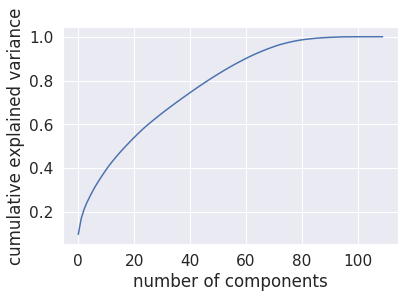

In [382]:
from sklearn.decomposition import PCA
#Instanciamos objeto PCA y aplicamos
pca=PCA() # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(_ds_standar) # obtener los componentes principales
X_pca=pca.transform(_ds_standar) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [383]:
pca.components_

array([[ 2.13e-03,  1.02e-01,  3.91e-02, ...,  3.31e-02,  9.67e-03,
        -1.15e-02],
       [-1.02e-01,  8.84e-02, -2.25e-01, ..., -1.65e-02, -2.65e-02,
        -1.76e-01],
       [ 1.74e-01,  7.21e-02, -9.77e-02, ..., -3.27e-02, -2.00e-02,
         4.11e-02],
       ...,
       [-0.00e+00, -2.29e-16, -2.31e-16, ..., -1.56e-16,  8.33e-17,
        -4.16e-17],
       [ 0.00e+00, -3.21e-16,  2.26e-16, ...,  1.11e-16,  1.39e-16,
         1.80e-16],
       [ 0.00e+00,  2.82e-16,  1.71e-16, ...,  2.18e-16, -5.03e-17,
         1.93e-16]])

- Observamos que con los 80 features más significativos podemos explicar más del 85% de la varianza en el dataset, lo que nos permite descartar los 48 restantes.

In [384]:
pca=PCA(n_components=60)
principalComponents = pca.fit_transform(_ds_standar)
_ds_pca_reduced = pd.DataFrame(data = principalComponents)
_ds_pca_reduced.shape,_ds_hogar.shape
_ds_pca_reduced['Target'] = _ds_hogar['Target']

In [385]:
_ds_hogar = _ds_pca_reduced

# División del dataset y entrenamiento de modelos

## A. Sin balanceo de clases

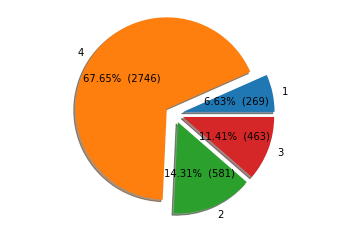

In [210]:
_ds_shuff = shuffle(_ds_hogar)
y = _ds_shuff['Target']
X = _ds_shuff
#Eliminamos Target para el conjunto de datos de entrenamiento
#X = X.drop(['Target','idhogar'], axis=1)
X = X.drop(['Target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=42)
plot_pie(y_train)

### A.1. Support Vector Machines

A continuación se aplicará un clasificador SVM.

In [211]:
model_svm = svm.SVC(C=1.0,
                    kernel="rbf", 
                    #class_weight = 'balanced',
                    random_state=0)
model_svm.fit(X_train, y_train)

/users/akraupl/miniconda3/envs/mentoria/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [212]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train =  model_svm.predict(X_train) # Obtenemos las predicciones para conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test =  model_svm.predict(X_test) # Obtenemos las predicciones para conjunto de validación
accuracy_test = accuracy_score(y_test, y_pred_test)

In [213]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.8354274451835427
Accuracy_test: 	0.7320197044334975


### A.2. Random Forest

A continuación se aplicará un Random Forest para clasificar nuestro dataset.

In [214]:
model_rf = ensemble.RandomForestClassifier(n_jobs=20,
                                           #class_weight = 'balanced',
                                           random_state=2,
                                           min_samples_leaf=1)
model_rf.fit(X_train, y_train)

/users/akraupl/miniconda3/envs/mentoria/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=20,
                       oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [215]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model_rf.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = model_rf.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [216]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.9908844542990884
Accuracy_test: 	0.6876847290640394


### A.3. Neural Network

A continuación se entrenará una red neuronal para clasificar el dataset. Pueden usar otra librería si lo desean, por ejemplo, Keras.

In [217]:
model_nn = neural_network.MLPClassifier(solver='lbfgs',
                                     #activation='logistic',
                                     alpha=1e-3, 
                                     hidden_layer_sizes=(5, 2),
                                     random_state=1, 
                                     max_iter=5000)
model_nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [218]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model_nn.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = model_nn.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [219]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.721359940872136
Accuracy_test: 	0.7044334975369458


### A.4. Clasificador por Votos

In [220]:
# Implementar VotingClassifier
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('rf', model_rf),
                                     ('svm', model_svm),
                                     ('nn', model_nn)],
                         voting='hard',
                        n_jobs=20)
eclf1 = eclf1.fit(X_train, y_train)

In [221]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = eclf1.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = eclf1.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.8543976348854397
Accuracy_test: 	0.729064039408867


## B. Sin balanceo de clases. Ponderando clases en modelos

### B.1. Support Vector Machines

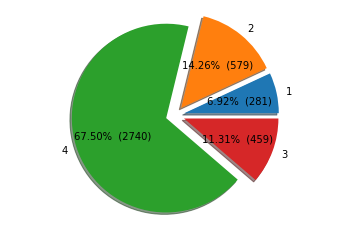

In [222]:
_ds_shuff = shuffle(_ds_hogar)
y = _ds_shuff['Target']
X = _ds_shuff
#Eliminamos Target para el conjunto de datos de entrenamiento
#X = X.drop(['Target','idhogar'], axis=1)
X = X.drop(['Target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=42)
plot_pie(y_train)

In [223]:
model_svm = svm.SVC(C=1.0,
                    kernel="rbf", 
                    class_weight = 'balanced',
                    random_state=0)
model_svm.fit(X_train, y_train)

/users/akraupl/miniconda3/envs/mentoria/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [224]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train =  model_svm.predict(X_train) # Obtenemos las predicciones para conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test =  model_svm.predict(X_test) # Obtenemos las predicciones para conjunto de validación
accuracy_test = accuracy_score(y_test, y_pred_test)

In [225]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.8450357230845036
Accuracy_test: 	0.6847290640394089


### B.2. Random Forest

A continuación se aplicará un Random Forest para clasificar nuestro dataset.

In [226]:
model_rf = ensemble.RandomForestClassifier(n_jobs=20,
                                           class_weight = 'balanced',
                                           random_state=2)
model_rf.fit(X_train, y_train)

/users/akraupl/miniconda3/envs/mentoria/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=20, oob_score=False,
                       random_state=2, verbose=0, warm_start=False)

In [227]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model_rf.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = model_rf.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [228]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.9933481152993349
Accuracy_test: 	0.7034482758620689


### B.3. Neural Network

A continuación se entrenará una red neuronal para clasificar el dataset. Pueden usar otra librería si lo desean, por ejemplo, Keras.

In [229]:
model_nn = neural_network.MLPClassifier(solver='lbfgs',
                                     #activation='logistic',
                                     alpha=1e-3, 
                                     hidden_layer_sizes=(5, 2),
                                     random_state=1, 
                                     max_iter=5000)
model_nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [230]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model_nn.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = model_nn.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)# Se calcula la exactitud para ambos conjuntos, train y test:


In [231]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.7302291204730229
Accuracy_test: 	0.6443349753694582


### B.4. Clasificador por Votos

In [232]:
# Implementar VotingClassifier
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('rf', model_rf),
                                     ('svm', model_svm),
                                     ('nn', model_nn)],
                         voting='hard',
                        n_jobs=20)
eclf1 = eclf1.fit(X_train, y_train)

In [233]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = eclf1.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = eclf1.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.9186991869918699
Accuracy_test: 	0.7054187192118226


## C. Con balanceo de clases. Método: SMOTE

Sampling_strategy: all
y: Counter({4: 2733, 2: 2733, 3: 2733, 1: 2733})


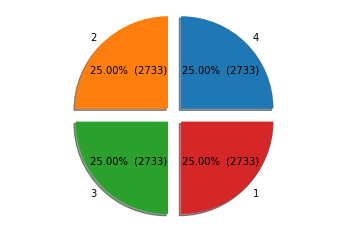

In [234]:
_ds_shuff = shuffle(_ds_hogar)
y = _ds_shuff['Target']
X = _ds_shuff
#Eliminamos Target para el conjunto de datos de entrenamiento
#X = X.drop(['Target','idhogar'], axis=1)
X = X.drop(['Target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=42)
sampling_strategy = 'all'

sm = SMOTE(random_state=42,
           k_neighbors=9,
          sampling_strategy=sampling_strategy,
          n_jobs=20)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('Sampling_strategy: {}\ny: {}'.format(sampling_strategy, Counter(y_train)))
plot_pie(y_train)

### C.1. Support Vector Machines

In [235]:
model_svm = svm.SVC(C=1.0,
                    kernel="rbf", 
                    #class_weight = 'balanced',
                    random_state=0)
model_svm.fit(X_train, y_train)

/users/akraupl/miniconda3/envs/mentoria/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [236]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train =  model_svm.predict(X_train) # Obtenemos las predicciones para conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test =  model_svm.predict(X_test) # Obtenemos las predicciones para conjunto de validación
accuracy_test = accuracy_score(y_test, y_pred_test)

In [237]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.9670691547749726
Accuracy_test: 	0.7211822660098522


### C.2. Random Forest

A continuación se aplicará un Random Forest para clasificar nuestro dataset.

In [238]:
model_rf = ensemble.RandomForestClassifier(n_jobs=20,
                                           #class_weight = 'balanced',
                                           random_state=2,
                                           min_samples_leaf=1)
model_rf.fit(X_train, y_train)

/users/akraupl/miniconda3/envs/mentoria/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=20,
                       oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [239]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model_rf.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = model_rf.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [240]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.9981705085986096
Accuracy_test: 	0.6


### C.3. Neural Network

A continuación se entrenará una red neuronal para clasificar el dataset. Pueden usar otra librería si lo desean, por ejemplo, Keras.

In [241]:
model_nn = neural_network.MLPClassifier(solver='lbfgs',
                                     #activation='logistic',
                                     alpha=1e-3, 
                                     hidden_layer_sizes=(5, 2),
                                     random_state=1, 
                                     max_iter=5000)
model_nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [242]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model_nn.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = model_nn.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [243]:
print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.628796194657885
Accuracy_test: 	0.5330049261083744


### C.4. Clasificador por Votos

In [244]:
# Implementar VotingClassifier
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('rf', model_rf),
                                     ('svm', model_svm),
                                     ('nn', model_nn)],
                         voting='hard',
                        n_jobs=20)
eclf1 = eclf1.fit(X_train, y_train)

In [245]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = eclf1.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = eclf1.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Accuracy_train:\t{}\nAccuracy_test: \t{}'.format(accuracy_train,accuracy_test))

Accuracy_train:	0.9735638492499086
Accuracy_test: 	0.6630541871921182


# ---------------------------------------------------------------------------------------------------------

###### Una vez ejecutados los mismos modelos con distintas maneras de evaluar y balancear las clases,utilizando los features originales o transformándolos por medio de PCA, podemos observar lo siguiente:
- Si se observa desde el punto de vista del balanceamiento de clases:
    - Clases desbalanceadas vs balanceadas: 
        - Random forest y la red neuronal arrojaron un accuracy más elevado.
        - SVM no arrojó grandes diferencias entre ambos tipos de dataset.
    - Features originales vs features obtenidos por PCA:
        - Claramente random forest y la red neuronal disminuyeron su accuracy aplicando PCA.
        - Lo contrario ocurrió con SVM, mejoró un poco, aunque no es significativo.
        
###### A partir de esta observación, decidimos seleccionar los modelos Random Forest y Red Neuronal, utilizando el dataset sin balancear para realizar obtener los parámetros que mejor se adapten a cada modelo y analizar resultados. Finalmente eligiremos uno de ellos.

# ---------------------------------------------------------------------------------------------------------

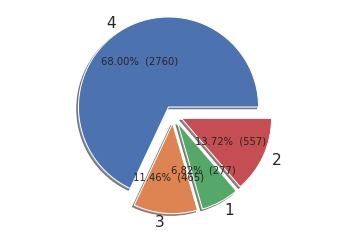

In [396]:
_ds_shuff = shuffle(_ds_hogar_original)
y = _ds_shuff['Target']
X = _ds_shuff
X = X.drop(['Target','idhogar'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=42)
plot_pie(y_train)

# RANDOM FOREST

In [397]:
exploring_params = {
                'criterion': ['gini','entropy'],
                'max_depth':[26,25,27], 
                'n_estimators':[175,180,185],
                'class_weight':['balanced', None],
        }

m = ensemble.RandomForestClassifier(random_state=2)
n_cross_val = 5 
#scoring = 'roc_auc'
model = GridSearchCV(m, exploring_params, cv=n_cross_val, n_jobs=20)
model.fit(X_train, y_train)

print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
print()
print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
print()
print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

print("================================================", end="\n\n")

Mejor conjunto de parámetros:
{'class_weight': None, 'criterion': 'gini', 'max_depth': 27, 'n_estimators': 180}


Puntajes de la grilla:


Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

              precision    recall  f1-score   support

           1       0.89      0.35      0.51        71
           2       0.70      0.47      0.56       158
           3       0.83      0.17      0.29       110
           4       0.78      0.99      0.87       676

    accuracy                           0.77      1015
   macro avg       0.80      0.50      0.56      1015
weighted avg       0.78      0.77      0.73      1015





In [400]:
class_weight= None
max_depth = 27
criterion = 'entropy'
n_estimators = 180
model =  ensemble.RandomForestClassifier(n_jobs=20,
                                         class_weight = class_weight,
                                         n_estimators = n_estimators,
                                         random_state = 2,
                                         criterion = criterion,
                                         max_depth = max_depth
                                        )
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#matrix = confusion_matrix(y_test, y_pred)
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred,pos_label=None)
#auc = metrics.auc(fpr, tpr)
print('Accuracy: ', accuracy, end="\n\n")
#print('Matrix: \n', matrix, end="\n\n")
#print('Roc_curve - fpr: ', fpr)
#print('Roc_curve - tpr: ', tpr)
#print('Roc_curve - thresholds: ', thresholds, end="\n\n")
#print('AUC: ', auc, end="\n\n")
print('classification_report: ')
print(classification_report(y_test, y_pred))

Accuracy:  0.7753694581280788

classification_report: 
              precision    recall  f1-score   support

           1       0.93      0.37      0.53        71
           2       0.72      0.46      0.56       158
           3       0.77      0.18      0.29       110
           4       0.78      0.99      0.87       676

    accuracy                           0.78      1015
   macro avg       0.80      0.50      0.56      1015
weighted avg       0.78      0.78      0.74      1015



In [401]:
def plot_cm(y_true, y_pred, figsize=(7,7)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm_perc, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    ax.set_ylim(len(cm), 0)

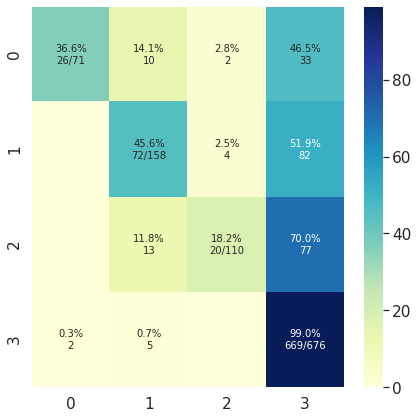

In [402]:
plot_cm(y_test, y_pred)

# RED NEURONAL

In [443]:
exploring_params = {
                'alpha':[1e-2,1e-1], 
                'solver':['sgd', 'adam'],
                'activation':['identity', 'tanh'],
                'alpha':[1e-1], 
                'solver':['adam'],
                'activation':['tanh'],
                'epsilon':[1e-10],
                #'learning_rate':['constant', 'invscaling', 'adaptive'],
                'hidden_layer_sizes':[(len(X_train),)],
                'max_iter':[500],
                'tol':[1e-6]
        }

m =  neural_network.MLPClassifier(random_state=1)
model_nn.fit(X_train, y_train)
n_cross_val = 5 
#scoring = 'roc_auc'
model = GridSearchCV(m, exploring_params, cv=n_cross_val, n_jobs=20)
model.fit(X_train, y_train)

print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
print()
print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
print()
print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

print("================================================", end="\n\n")

Mejor conjunto de parámetros:
{'activation': 'tanh', 'alpha': 0.1, 'epsilon': 1e-10, 'hidden_layer_sizes': (4059,), 'max_iter': 500, 'solver': 'adam', 'tol': 1e-06}


Puntajes de la grilla:


Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

              precision    recall  f1-score   support

           1       0.69      0.38      0.49        71
           2       0.60      0.53      0.56       158
           3       0.59      0.44      0.50       110
           4       0.85      0.95      0.89       676

    accuracy                           0.79      1015
   macro avg       0.68      0.57      0.61      1015
weighted avg       0.77      0.79      0.77      1015





In [440]:
alpha = 1e-1
solver = 'adam'
activation = 'tanh'
epsilon = 1e-10
learning_rate = 'constant'
hidden_layer_sizes = (100,4)
max_iter = 500
tol = 1e-6

model =  neural_network.MLPClassifier(alpha=alpha,
                                      solver=solver,
                                      activation=activation,
                                      epsilon=epsilon,
                                      learning_rate=learning_rate,
                                      hidden_layer_sizes=hidden_layer_sizes,
                                      max_iter=max_iter,
                                      tol=tol,
                                      random_state=1
                                     )
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred,pos_label=None)
#auc = metrics.auc(fpr, tpr)
print('Accuracy: ', accuracy, end="\n\n")
#print('Matrix: \n', matrix, end="\n\n")
#print('Roc_curve - fpr: ', fpr)
#print('Roc_curve - tpr: ', tpr)
#print('Roc_curve - thresholds: ', thresholds, end="\n\n")
#print('AUC: ', auc, end="\n\n")
print('classification_report: ')
print(classification_report(y_test, y_pred))

Accuracy:  0.7566502463054188

classification_report: 
              precision    recall  f1-score   support

           1       0.55      0.34      0.42        71
           2       0.56      0.49      0.53       158
           3       0.47      0.43      0.45       110
           4       0.84      0.92      0.88       676

    accuracy                           0.76      1015
   macro avg       0.61      0.54      0.57      1015
weighted avg       0.74      0.76      0.74      1015



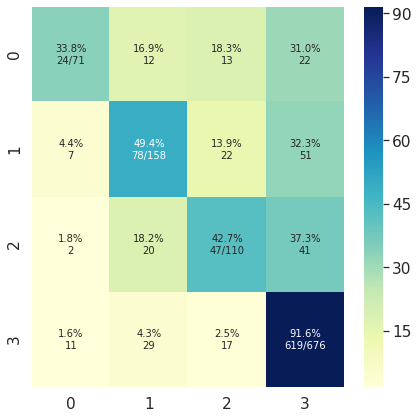

In [441]:
plot_cm(y_test, y_pred)

In [442]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print('Accuracy: ', accuracy, end="\n\n")

Accuracy:  0.9990145355999015



# ---------------------------------------------------------------------------------------------------------

### 5. Selección del Modelo

#### 5.1. Selección y Descripción de Hipótesis

Describir el problema y la hipótesis del modelo.

- El modelo seleccionado para la clasificación es la Red Neuronal. Si bien el accuracy de Random Forest es algunos puntos superior, se da porque mayormente predice resultados de la clase mayoritaria, y dado el desbalance de clases, es alto. Pero con las demás clases posee muchos errores.
- La red neuronal se adapta en mejor medida a la distribución de clases que posee el dataset.
- Utilizamos la funcion `tanh` como función de activación por ser la que mejor se adaptó al problema.

#### 5.2. Selección de Regularizador

 ¿Utilizaron algún regularizador?¿Cuál?

- Regularizador L2. Value: 0.1
- Parámetro tol = 1e-6 . Si el aprendizaje de una iteración a otra es menor a tol, cortamos el mismo.
- 500 iteraciones como máximo puede tener la red.

#### 5.3. Selección de Función de Costo

¿Cuál fue la función de costo utilizada?

- MLP utiliza LBFGS como función de costo.
- El optimizador de esta función de costo utilizado es `adam`.

#### 5.4. Justificación de las Selecciones

A continuación, se justifican las elecciones previas.